In [9]:
%matplotlib inline
import msprime
import numpy as np
import seaborn as sns

from IPython.display import SVG


## Running simulations

At the simplest level, coalescent simulation is about generating trees. These trees represent the simulated history of a sample of individuals drawn from an idealised population (in later sections we show how to vary the properites of this idealised population). The function ``msprime.simulate`` runs these simulations, and the parameters that we provide to this function determine the exact simulation that we run. It returns a ``TreeSequence`` object, which represents the full simulated history of the sample. In later sections we discuss the effects of recombination, when this ``TreeSequence`` contains a list of correlated trees. For now, we assume that there is no recombinations, and we use the method ``first()`` to obtain the tree object from this tree sequence. For example, here we simulate a history for a sample of three chromosomes:

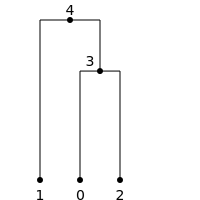

In [33]:
ts = msprime.simulate(3)
tree = ts.first()
SVG(tree.draw())

In this tree we have 5 nodes. Nodes 0, 1 and 2 are *leaves*, and represent our samples. Node 3 is an *internal* node, and is the parent of 0 and 1. Node 4 is also an internal node, and is the root of the tree. In mpsrime, we always refer to nodes by their integer IDs and obtain information about these nodes by calling methods on the tree object. For example the code ``tree.children(4)`` will return the tuple ``(2, 3)`` here, as these are the node IDs of the children of the root node. Similarly, ``tree.parent(0)`` will return ``3``.

The height of nodes in a tree are determined by their *time*; this is how long ago the ancestor that corresponds the node was born. So, contemporary samples always have a node time of zero, and time values increase as we go upwards in the tree (and further back in time). Times in msprime are always measured in *generations*. 

When we run a single simulation, the resulting tree is a single random sample from the probability distribution of coalescent trees. Since a single random draw from any distribution is not usually informative, we nearly always need to run many different *replicate* simulations to obtain useful information. This simplest way to do this in msprime is to use the ``num_replicates`` argument.

In [40]:
N = 1000
mean_T_mrca = 0
for ts in msprime.simulate(10, num_replicates=N):
    tree = ts.first()
    mean_T_mrca += tree.time(tree.root)
mean_T_mrca = mean_T_mrca / N
mean_T_mrca

3.5490350726811175

In this example we run 1000 independent replicates of the coalescent for a sample of 10 chromosomes, and compute the mean time to the most recent common ancestor of the entire sample, or equivalently the root of the tree. (The value we obtain is a highly unrealistic 3.5 generations in the past; however, this is unsurprising since we have specified a highly unrealistic population model. See the next for more details on how to specify population models and interpret simulation times.) The ``simulate`` function behaves slightly differently when it is called with the ``num_replicates`` argument: rather than returning a single tree sequence we return an *iterator* over the individual replicates. What this essentially means is that we can use the convenient **for** loop construction to consider each simulation in turn, but without actually storing all these simulations. As a result, we can run millions of replicates using this method if needs be without using any extra storage.

When simulating coalescent trees, we are often interested in more than just the mean of the distribution of some statistic. Rather than compute the various summaries by hand (as we have done for the mean in the last example), it is much more convenient to store the result for each replicate and analyse this array after the simulations have completed. For example:

In [36]:
N = 1000
T_mrca = np.zeros(N)
for j, ts in enumerate(msprime.simulate(10, num_replicates=N)):
    tree = ts.first()
    T_mrca[j] = tree.time(tree.root)
np.mean(T_mrca), np.var(T_mrca)

(3.568437616871313, 4.251691923284481)

Here we simulate 1000 replicates, storing the time to the most recent common ancestor for each replicate in the array ``T_mrca``. We use the Python ``enumerate`` function here to simplify the process of efficiently inserting values into this array, which simply ensures that ``j`` for the first replicate, ``1`` for the second, and so on. Thus, by the time we finish the loop, the array has been filled with T_mrca values randomly generated under the coalescent. We then use the ``numpy`` library (which has an extensive suite of statistical functions) to compute the mean and variance of this array. This example is idiomatic, and we will use this type of approach throughout the rest of this tutorial.

## Population models

In the previous section the only parameters that we supplied to ``simulate`` were the ``sample_size`` and ``num_replicates`` parameters.

**TODO**

- Explain Ne
- Explain expanding/contracting populations
